In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def inpainting(A,x,m,_lambda=1):
    eigs = np.linalg.eigvals(A)
    lambda_max = max(map(np.abs,eigs))
    A /= lambda_max
    A_tilde = (np.eye(A.shape[0]) - A).T @(np.eye(A.shape[0]) - A)
    Z = np.zeros(A.shape)
    Z[0:m,0:m] = np.eye(m)
    x_star = np.linalg.inv(Z+_lambda*A_tilde)@x
    return x_star



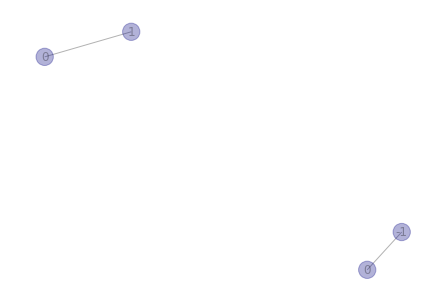

In [3]:
A = np.zeros((4,4))
A[0,2] = 1
A[2,0] = 1
A[1,3] = 1
A[3,1] = 1

G = nx.from_numpy_array(A)
x = [1,-1,0,0]
labeldict = {0:x[0],1:x[1],2:x[2],3:x[3]}
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = np.ones(A.shape[0]),alpha=0.3,labels=labeldict)
plt.show()

In [4]:
inpainting(A,x,2)

array([ 1., -1.,  1., -1.])

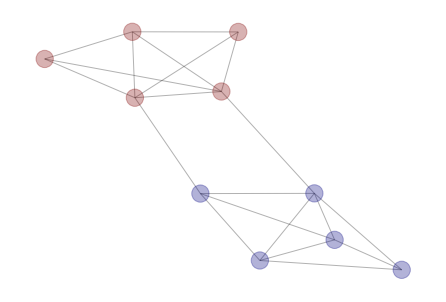

In [5]:
numsig = 2
graph_sz = 10
num_edges = graph_sz*6

def sig2idx(sig):
    if sig==-1:
        return 0
    return 1

def get_randomA(graph_sz,seed=0,connect_probs = np.array([[.95,.05],[.05,.95]])):
    np.random.seed(seed)
    signal = np.ones(graph_sz).astype('int')#np.random.choice(range(numsig),graph_sz,p=[1/numsig]*numsig)
    signal[:graph_sz//2] = -1
    np.random.shuffle(signal)

    A = np.zeros(graph_sz**2).reshape(graph_sz,graph_sz)

    i= 0
    while i < num_edges:
        a,b = np.random.randint(0,graph_sz,2)
        while a == b:
            a,b = np.random.randint(0,graph_sz,2)
        sa,sb = signal[a],signal[b]
        if np.random.uniform() < connect_probs[sig2idx(sa),sig2idx(sb)]:
            A[a,b] = 1
            A[b,a] = 1
            i += 1
    return A,signal

A,signal=get_randomA(graph_sz)            
G=nx.from_numpy_array(A)

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = signal,alpha=0.3)
plt.show()

In [6]:
signal

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1])

In [7]:
x = np.zeros(len(signal)).astype('int')
x[:6] = signal[:6]
x

array([-1,  1, -1,  1, -1,  1,  0,  0,  0,  0])

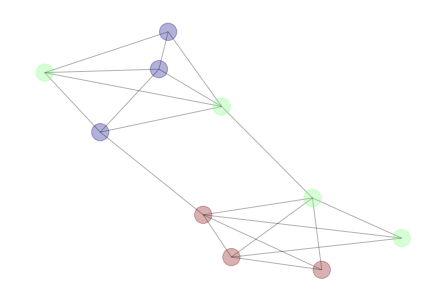

In [8]:
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = x,alpha=0.3)
plt.show()

In [9]:
inpainting(A,x,6)

array([-1.04677377,  0.880632  , -0.79235199,  1.0005998 , -0.92680597,
        0.89408655,  0.78817311, -0.8964539 , -1.07706266,  0.80105496])

In [10]:
def threshold(ar):
    return (ar > 0)*2-1

threshold(inpainting(A,x,6))

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1])

In [11]:
signal

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1])

In [12]:
x

array([-1,  1, -1,  1, -1,  1,  0,  0,  0,  0])

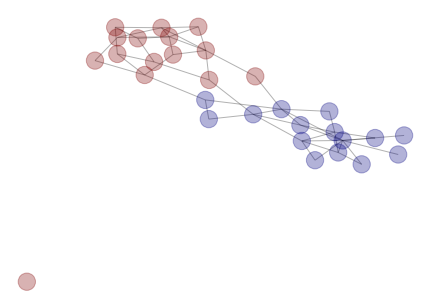

In [13]:
A,signal=get_randomA(30)            
G=nx.from_numpy_array(A)

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = signal,alpha=0.3)
plt.show()

In [14]:
x = np.zeros(len(signal)).astype('int')
x[:2] = signal[:2]
x

array([-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

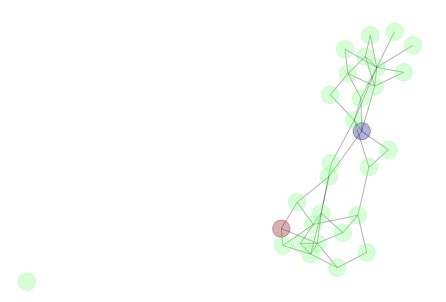

In [15]:
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = x,alpha=0.3)
plt.show()

In [16]:

recovered = threshold(inpainting(A,x,2))
recovered

array([-1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1])

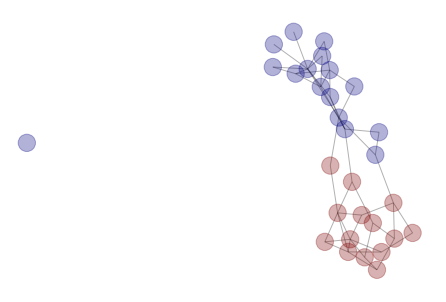

In [17]:
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = recovered,alpha=0.3)
plt.show()

In [18]:
signal

array([-1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1])

In [19]:
recovered

array([-1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1])

In [20]:
signal != recovered

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

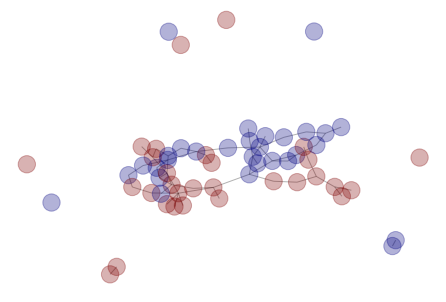

In [21]:
connect_probs = np.array([[.80,.15],[.15,.80]])

A,signal=get_randomA(60,seed=1,connect_probs=connect_probs)            
G=nx.from_numpy_array(A)

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = signal,alpha=0.3)
plt.show()

In [22]:
x = np.zeros(len(signal)).astype('int')
x[:20] = signal[:20]
x

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0])

In [23]:
recovered = threshold(inpainting(A,x,2))
recovered

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
        1, -1, -1, -1,  1, -1,  1,  1,  1])

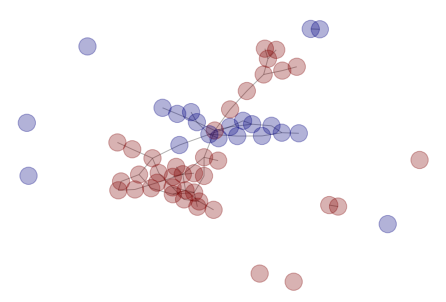

In [24]:
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = recovered,alpha=0.3)
plt.show()

In [25]:
recovered != signal

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False])

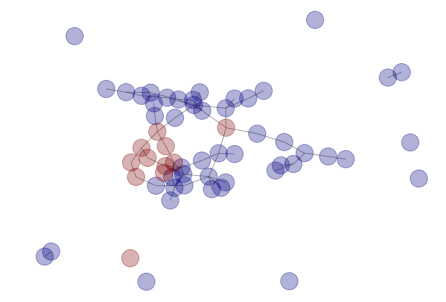

In [26]:
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = (recovered!=signal),alpha=0.3)
plt.show()

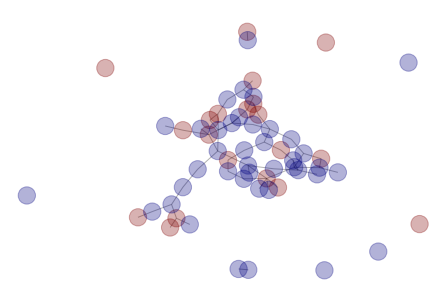

In [27]:
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = (x!=0),alpha=0.3)
plt.show()

In [49]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")

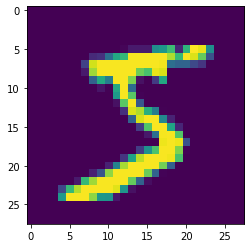

In [135]:
digits=dataset.data
a_digit = np.array(digits.loc[0]).reshape((28,28))

plt.imshow(a_digit)
plt.show()

In [64]:
target = dataset.target
target[:4]

0    5
1    0
2    4
3    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [74]:
ones=digits.loc[target=='1'].sample(1000)
zeros=digits.loc[target=='0'].sample(1000)

ones.shape,zeros.shape

((1000, 784), (1000, 784))

In [119]:
import pandas as pd
onesandzeros=pd.concat([ones,zeros])
onesandzeros.shape
np.random.seed(42)
p=np.random.permutation(onesandzeros.shape[0])
onesandzeros=onesandzeros.iloc[p]

In [120]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

D = np.zeros((2000,2000))
for i in range(2000):
    for j in range(i+1,2000):
        D[i,j] = distance(onesandzeros.iloc[i],onesandzeros.iloc[j])
        D[j,i] = D[i,j]

In [121]:
A = np.zeros((2000,2000))
for i in range(2000):
    A[i,np.argsort(D[i,:])[1:7]] =1
    A[np.argsort(D[i,:])[1:7],i] =1
    

In [122]:
signal=target[onesandzeros.index].astype('int')*2-1
signal

43059   -1
68633    1
20095   -1
52492    1
40260   -1
        ..
29862   -1
53861   -1
30852    1
56450   -1
19104   -1
Name: class, Length: 2000, dtype: int64

In [136]:
x = np.zeros(len(signal)).astype('int')
m=200
x[:m] = signal[:m]
x

array([-1,  1, -1, ...,  0,  0,  0])

In [137]:
recovered = threshold(inpainting(A,x,m))
recovered

array([-1,  1, -1, ...,  1, -1, -1])

In [138]:
np.sum(recovered!=signal)

2

In [139]:
np.where(recovered != signal)

(array([252, 827]),)

In [130]:
onesandzeros.index[[252,827]]

Int64Index([30123, 64065], dtype='int64')

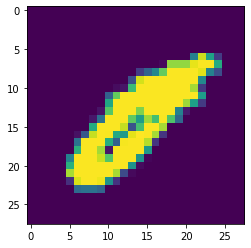

In [132]:
a_digit = np.array(digits.loc[30123]).reshape((28,28))

plt.imshow(a_digit)
plt.show()

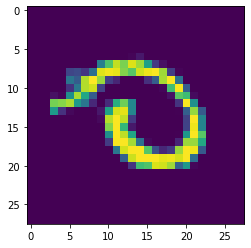

In [134]:
a_digit = np.array(digits.loc[64065]).reshape((28,28))

plt.imshow(a_digit)
plt.show()